# Boston Housing Price Prediction 
## (Linear Regression)

## 1 Introduction

In this document we will predict the median house values in the Boston area with linear regression, using the Boston housing data from sklearn datasets. 

The Boston housing data set provides records measurements of 13 attributes of housing markets around Boston, as well as the median price. 

## 2 Import the necessary libraries 

In [37]:
import numpy as np  # multi-dimensional arrays manipulating
import pandas as pd  # data management and data analysis
import sklearn # machine learning library
import matplotlib.pylab as pl  # data visualization
import seaborn as sns # data visualization

## 3 Explore the data 

In [3]:
from sklearn import datasets

boston = datasets.load_boston() # Dictionary-like object that exposes its keys as attributes.

X_boston,y_boston = boston.data, boston.target # Create "X" matrix and "y" vector from the dataset.

# X_boston = store the data
# y_boston = store the classes/targets

print('Shape of data: {} {}'.format(X_boston.shape, y_boston.shape))

Shape of data: (506, 13) (506,)


Let's see the content of the dataset, which are the "keys or features" of the attributes and the general description:

In [4]:
print('keys: {}'.format(boston.keys()))
print('feature names: {}'.format(boston.feature_names))
print(boston.DESCR)

keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances 

## 4 Data Visualization 

Let's predict median house values in the Boston area using as the predictor one of the attributes, for instance, LSTAT, defined as the "proportion of lower status of the population"

### 4.1 Histograms 

Text(0, 0.5, 'count')

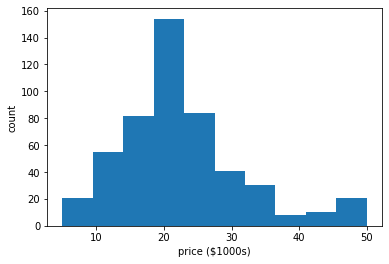

In [35]:
# Histogram of prices
plt.hist(y_boston) 
plt.xlabel('price ($1000s)')
plt.ylabel('count')

### 4.2 Linear Regression 

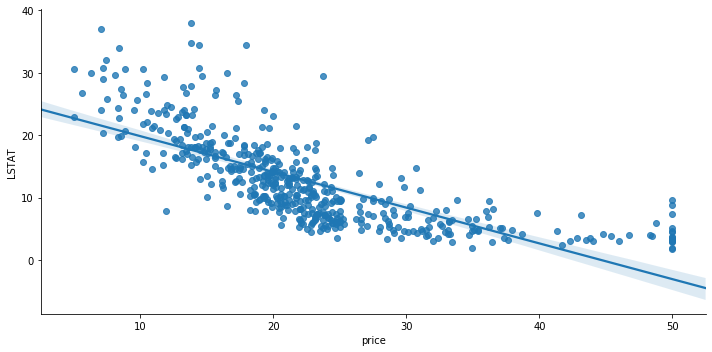

In [38]:
# Visualization of the relations between price and LSTAT
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names) # Create a DataFrame from the Boston dataset
df_boston['price'] = boston.target
sns.lmplot("price", "LSTAT", df_boston, aspect=2);

Comments: It looks like the relationship between the house price and lstat non-linear.

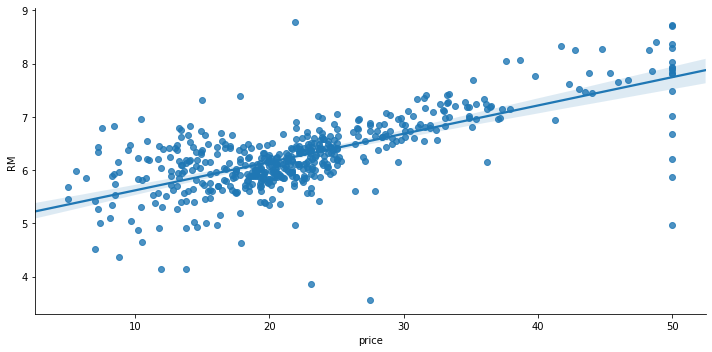

In [39]:
# Visualization of the relations between price and "average number of rooms per dwelling"
sns.lmplot("price", "RM", df_boston, aspect=2);

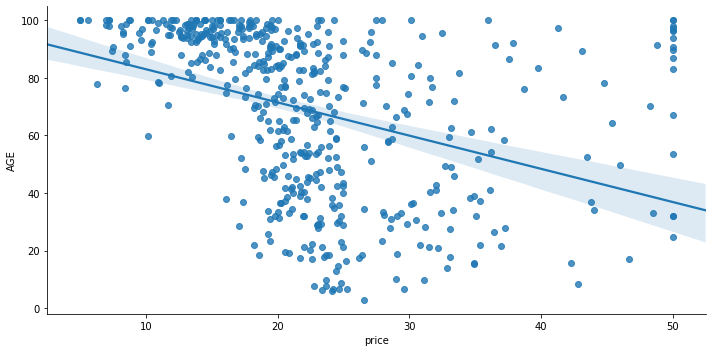

In [41]:
# Visualization of the relations between price and "average number of rooms per dwelling"
sns.lmplot("price", "AGE", df_boston, aspect=2);

Comments: It looks like the relationship between the house price and the variables "RM" and "AGE" is linear.

### 4.3 Polinomial Regression 

Let's build again the plot of house price and LSTAT, including higher order terms:

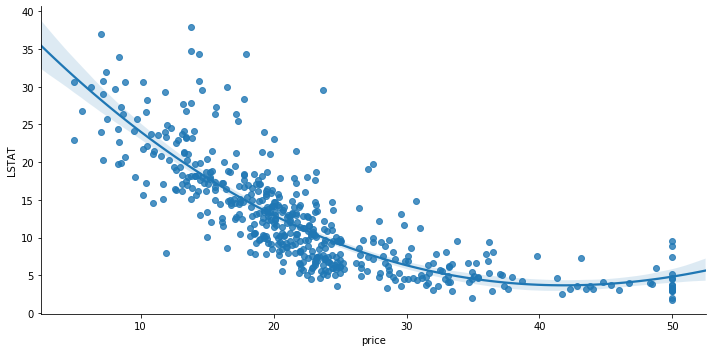

In [40]:
# Estimate a polynomial regression of order 3
sns.lmplot("price", "LSTAT", df_boston, order=3, aspect=2);

Comments: It looks like the relationship between LSTAT and house price is polinomial (curve).

### 4.4 Heatmaps

Use a diagonal correlaton matrix heatmap for studying the variables relationship.

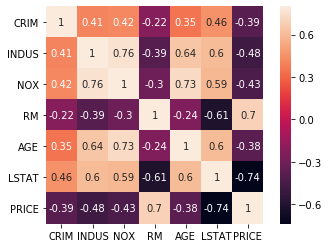

In [42]:
# Plot just 7 of the 13 variables: PRICE, LSTAT, AGE, RM, NOX, INDUS, CRIM.
indexes=[0,2,4,5,6,12]
df_boston2 = pd.DataFrame(boston.data[:,indexes], columns=boston.feature_names[indexes])
df_boston2['PRICE'] = boston.target
corrmat = df_boston2.corr()
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)

Comments: We can observe that "RM" and "LSTAT" are the variables more correlated with "Price" (last row).

### 4.5 Scatter Plots Matrix 

Let's explore multiple variables relationships using a scatter plot matrix

In [43]:
print(boston.feature_names)
indexes3=[5,6,12]
print(boston.feature_names[indexes3])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
['RM' 'AGE' 'LSTAT']


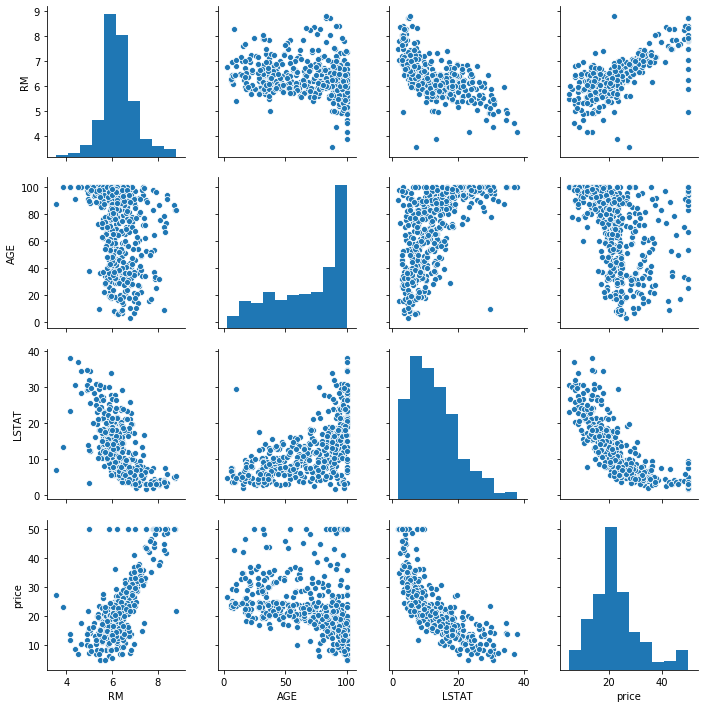

In [44]:
#build the scatter plots matrix
df_boston3 = pd.DataFrame(boston.data[:,indexes3], columns=boston.feature_names[indexes3])
df_boston3['price'] = boston.target
sns.pairplot(df_boston3) # Plot pairwise relationships in the dataset

In [45]:
# Building a scatter plot matrix using the scatter_matrix method in pandas.tools.plotting
# pd.plotting.scatter_matrix(df_boston3, figsize=(12.0,12.0))

## 5 Prediction and Evaluation 

Let's make predictions using the Scikit-learn library, building a linear regression model.

In [5]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

reg = LinearRegression() # Create the Linear Regression estimator
reg.fit ([[0, 1], [1, 1], [2, 1]], [0, 1, 2])  # Perform the fitting
reg.coef_  # Store the status of the estimator

array([1., 0.])

### 5.1 Training and Test Split 

Split the Boston data into training set and testing set:

In [9]:
print('The shape of the Boston dataset is: ',X_boston.shape)

The shape of the Boston dataset is:  (506, 13)


In [6]:
# "Training set" to train the system
# "Test set" to evaluate the learned or trained system

train_size = int(X_boston.shape[0]/2)
X_train = X_boston[:train_size]
X_test = X_boston[train_size:]
y_train = y_boston[:train_size]
y_test = y_boston[train_size:]
print('Train and test sizes {} {}'.format(X_train.shape, X_test.shape))

Train and test sizes (253, 13) (253, 13)


### 5.2 Lineal Regression Model Analysis 

Calculation of the coefficients and intercept values of the linear regression estimator:

In [7]:
regr_boston = LinearRegression()  # Create the Linear Regression estimator
regr_boston.fit(X_train, y_train) # Perform the fitting
print('"Coeff" and "intercept": {} {}'.format(regr_boston.coef_, regr_boston.intercept_))

"Coeff" and "intercept": [ 1.20133313  0.02449686  0.00999508  0.42548672 -8.44272332  8.87767164
 -0.04850422 -1.11980855  0.20377571 -0.01597724 -0.65974775  0.01777057
 -0.11480104] -10.017430582944993


In [ ]:
# y = a + bx
# coeff (b) => the coefficients
# intercept (a) => the constant

Visualization of the coefficients and the intercerpt:

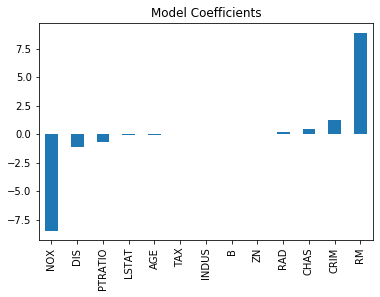

In [8]:
from pandas import Series
# Plotting model coefficients:
coef = Series(regr_boston.coef_, boston.feature_names).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

Let's compute Score and MSE for training and testing sets:

A) Compute Score ($R^2$) for training and testing sets

The best possible score for $R^2$ is 1.0 (when $\textbf{u}=0$); lower values are worse. $R^2$ is 0.0 when $\textbf{u}=\textbf{v}$.

In [9]:
print('Training Score: {}'.format(regr_boston.score(X_train, y_train)))
print('Testing Score: {}'.format(regr_boston.score(X_test, y_test)))

Training Score: 0.8557827200735684
Testing Score: -2.2527343423925448


B) Compute MSE (Mean Squared Error) for training and testing sets

In [10]:
print('Training MSE: {}'.format(np.mean((regr_boston.predict(X_train) - y_train)**2)))
print('Testing MSE: {}'.format(np.mean((regr_boston.predict(X_test) - y_test)**2)))

Training MSE: 9.987517325463743
Testing MSE: 303.4368629265912


Comments: We can see that all the coefficients obtained are different from zero, meaning that no variable is discarded

### 5.3 Regularization: Ridge and Lasso regression

#### Ridge Regression 

Compute the Ridge Regression:

In [11]:
regr_ridge = linear_model.Ridge(alpha=.3) # Create a Ridge regressor
regr_ridge.fit(X_train, y_train)  # Perform the fitting

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Calculation of the coefficients and intercept values of the linear regression estimator:

In [12]:
print('Coeff and intercept: {} {}'.format(regr_ridge.coef_,  regr_ridge.intercept_))

Coeff and intercept: [ 1.02306982e+00  2.46624258e-02 -3.35255156e-04  4.32153462e-01
 -5.44287640e+00  8.87526668e+00 -4.93894389e-02 -1.07418749e+00
  1.98215897e-01 -1.61729094e-02 -6.39546558e-01  1.80886392e-02
 -1.21115342e-01] -11.836790865166382


Visualization of the coefficients and the intercerpt:

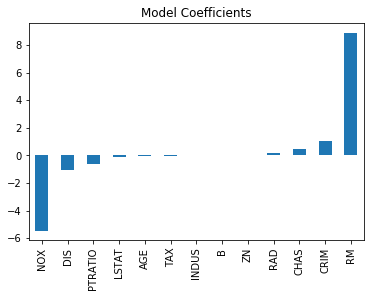

In [13]:
coef = Series(regr_ridge.coef_, boston.feature_names).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

Let's compute Score and MSE for training and testing sets:

A) Compute Score ( 𝑅2 ) for training and testing sets

The best possible score for  𝑅2  is 1.0 (when  𝐮=0 ); lower values are worse.  𝑅2  is 0.0 when  𝐮=𝐯 .

In [14]:
print('Training Score: {}'.format(regr_ridge.score(X_train, y_train)))
print('Testing Score: {}'.format(regr_ridge.score(X_test, y_test)))

Training Score: 0.8554986478280451
Testing Score: -1.5272153871196825


B) Compute MSE (Mean Squared Error) for training and testing sets

In [15]:
print('Training MSE: {}'.format(np.mean((regr_ridge.predict(X_train) - y_train)**2)))
print('Test MSE: {}'.format(np.mean((regr_ridge.predict(X_test) - y_test)**2)))

Training MSE: 10.0071902556098
Test MSE: 235.7555915382107


Comments: We realized that the values have been adjusted, especially the test results.

#### Lasso Regression 

Compute the Ridge Regression:

In [16]:
regr_lasso = linear_model.Lasso(alpha=.3) # Create a Lasso regressor
regr_lasso.fit(X_train, y_train)  # Perform the fitting

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Compute the Ridge Regression:

In [17]:
print('Coeff and intercept: {} {}'.format(regr_lasso.coef_,  regr_lasso.intercept_))

Coeff and intercept: [ 0.          0.01996512 -0.          0.         -0.          7.69894744
 -0.03444803 -0.79380636  0.0735163  -0.0143421  -0.66768539  0.01547437
 -0.22181817] -6.1832418361484045


Visualization of the coefficients and the intercerpt:

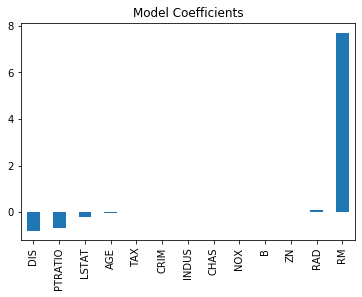

In [18]:
coef = Series(regr_lasso.coef_, boston.feature_names).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

Let's compute Score and MSE for training and testing sets:

A) Compute Score ( 𝑅2 ) for training and testing sets

The best possible score for  𝑅2  is 1.0 (when  𝐮=0 ); lower values are worse.  𝑅2  is 0.0 when  𝐮=𝐯 .

In [19]:
print('Training Score: {}'.format(regr_lasso.score(X_train, y_train)))
print('Testing Score: {}'.format(regr_lasso.score(X_test, y_test)))

Training Score: 0.8449992039829642
Testing Score: 0.501127529021216


B) Compute MSE (Mean Squared Error) for training and testing sets

In [20]:
print('Training MSE: {}'.format(np.mean((regr_lasso.predict(X_train) - y_train)**2)))
print('Test MSE: {}'.format(np.mean((regr_lasso.predict(X_test) - y_test)**2)))

Training MSE: 10.734311009544221
Test MSE: 46.538168094875665


Comments: The result of the model fitting for a set of sparse coefficients is much better than before (using all the variables), with the score increasing from -2.25 (LR) and -1.52 (Ridge) to 0.50. 

This fact demonstrates that four of the initial variables are not important for the prediction and confuse the regressor.

Let's review the shape of the data and the features name:

In [21]:
print(boston.data.shape)
print(boston.target.shape)
print(boston.feature_names)

(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Print the Max/Min/Mean price:

In [22]:
print('Max price {}, min price {}, and mean price {}'.format(np.max(boston.target), np.min(boston.target), np.mean(boston.target)))

Max price 50.0, min price 5.0, and mean price 22.532806324110677


Now, we need to identify what are the non important variables for the analysis.

Let's start creating an "Index Array" of the coefficients, with the aim of manipulating the data easy:

In [23]:
ind=np.argsort(np.abs(regr_lasso.coef_))
print('Order variable (from less to more important): {}'.format(boston.feature_names[ind]))

Order variable (from less to more important): ['CRIM' 'INDUS' 'CHAS' 'NOX' 'TAX' 'B' 'ZN' 'AGE' 'RAD' 'LSTAT' 'PTRATIO'
 'DIS' 'RM']


In [24]:
indexes_non_selected=[0,2,3,4]
print('Non important variable: {}'.format(boston.feature_names[indexes_non_selected]))
most_important_index=[5]
print('Most important variable: {}'.format(boston.feature_names[most_important_index]))

Non important variable: ['CRIM' 'INDUS' 'CHAS' 'NOX']
Most important variable: ['RM']


We can also select the most important features (K best features) using the module feature_selection of sklearn, which can be used for feature selection/dimensionality reduction on sample sets.

In [27]:
import sklearn.feature_selection as fs 

# Create and fit selector
selector = fs.SelectKBest(score_func=fs.f_regression,k=5) # Select features according to the k highest scores.
X_new = selector.fit(X_train,y_train) # Perform the fitting

# Show the selected features (False => Non important variables; True => Important variables)
list(zip(selector.get_support(), boston.feature_names))


[(False, 'CRIM'),
 (False, 'ZN'),
 (True, 'INDUS'),
 (False, 'CHAS'),
 (False, 'NOX'),
 (True, 'RM'),
 (True, 'AGE'),
 (False, 'DIS'),
 (False, 'RAD'),
 (False, 'TAX'),
 (True, 'PTRATIO'),
 (False, 'B'),
 (True, 'LSTAT')]

The set of selected features is now different, since the criterion has changed. However, three of the most important features are among them: 'RM', 'PTRATIO' and 'LSTAT'.

For more information, please check the following sklearn official documentation:

[SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)

[Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html)

### 5.4 Evaluate predictions by visualizing prediction errors

Let's evaluate the predictions by visualizing prediction errors:

Text(0, 0.5, 'Predicted price ($1000s)')

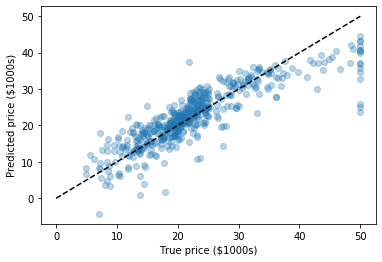

In [30]:
import matplotlib.pylab as plt
%matplotlib inline

regr_boston_all = LinearRegression() # Create the Linear Regression estimator
regr_boston_all.fit(boston.data, boston.target) # Fitting with all the data (not just the training data) and all the features
predicted = regr_boston_all.predict(boston.data) # Perform prediction of all the data

# Visualization of target and predicted responses of the boston data:
plt.scatter(boston.target, predicted, alpha=0.3)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')

Text(0.5, 1.0, 'Residual plot')

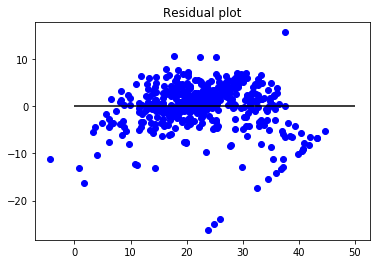

In [31]:
x_plot = plt.scatter(predicted, (predicted - boston.target), c='b')
plt.hlines(y=0, xmin= 0, xmax=50)
plt.title('Residual plot')

Model evaluation:

In [32]:
print('Score: {}'.format(regr_boston_all.score(boston.data, boston.target)))  # Best possible score is 1.0, lower values are worse.

Score: 0.7406426641094095


Compute Score using a single feature:

In [34]:
# Score using a single feature
regr_feat1 = LinearRegression()
for i in np.arange(13):
    feat1=X_train[:,i:i+1]
    regr_feat1.fit(feat1, y_train)    
    print('Feature: {}'.format(boston.feature_names[i]))
    print('Score: {}'.format(regr_feat1.score(feat1, y_train)))

Feature: CRIM
Score: 0.05024843836202264
Feature: ZN
Score: 0.10206594240694711
Feature: INDUS
Score: 0.13068434569181497
Feature: CHAS
Score: 0.00018610373661331892
Feature: NOX
Score: 0.11130139266941119
Feature: RM
Score: 0.7699004053318655
Feature: AGE
Score: 0.11300215206715913
Feature: DIS
Score: 0.018087821597697507
Feature: RAD
Score: 0.0015003535946076507
Feature: TAX
Score: 0.05512205417475469
Feature: PTRATIO
Score: 0.13721073435814335
Feature: B
Score: 0.0463878641534512
Feature: LSTAT
Score: 0.5035503901281464
